In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# MCMV (Monte Carlo Mean Value)

*"Calculate the volume of a "sphere" with radius r=1 in a ten dimensional space."*

The integral that must be solved it order to find the Volume is:

\begin{equation*}
    I = \frac{2^{10}}{N}\cdot \sum_{i=1}^N f(x_i,x_{i+1},..,x_{i+9})
\end{equation*}

where 10 in $2^{10}$ is the number of dimensions and N is the number of samples for the range of [-1, 1] for every x(dimension).

the function $f(x_i,x_{i+1},...,x_{i+9})$ is described by the equation of the sphere:
\begin{equation*}
    \sum_{i=1}^{10} x_i^2 = 1
\end{equation*}

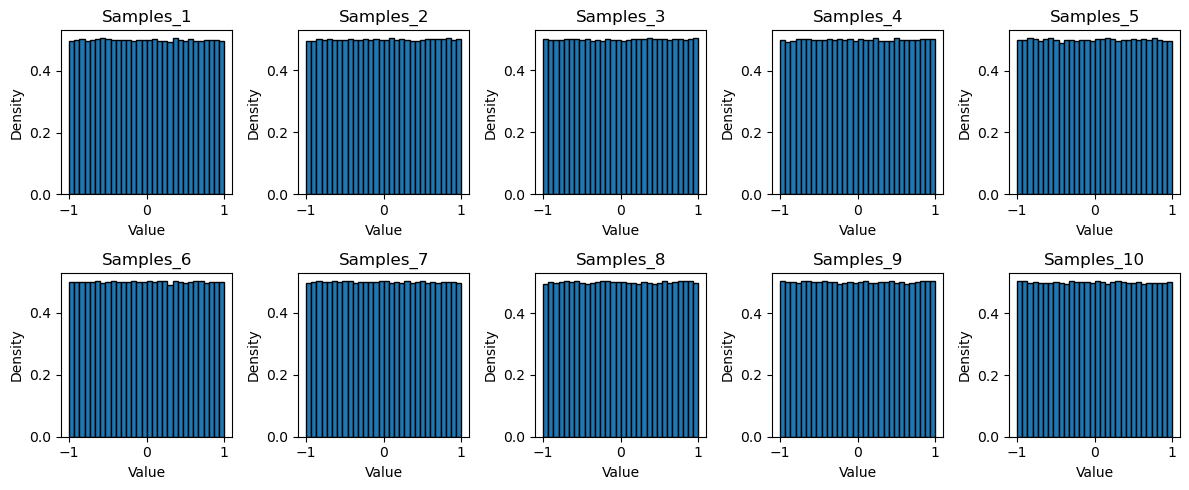

In [78]:
samples = pd.DataFrame()
sample_size = 1000000

for i in range(1,11):
    exec(f"samples_{i} = np.random.uniform(-1, 1, {sample_size})")
    exec(f"samples[f'samples_{i}'] = samples_{i}")

plt.figure(figsize=(12, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    exec(f"plt.hist(samples_{i+1}, bins=30, density=True, edgecolor='black')")
    plt.title(f'Samples_{i+1}')
    plt.xlabel('Value')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [79]:
I = 0
samples = samples ** 2
samples['sum'] = samples.sum(axis=1)

for i in range(sample_size):
    if samples['sum'].iloc[i] < 1.0:
        I +=  1

I = 2**10/sample_size * I
samples

,samples_1,samples_2,samples_3,samples_4,samples_5,samples_6,samples_7,samples_8,samples_9,samples_10,sum
0,0.365029,0.482014,0.257239,0.645363,0.108908,0.467849,0.000696,0.067106,7.289656e-01,0.187840,3.311009
1,0.056776,0.818592,0.154018,0.878538,0.791440,0.176136,0.323309,0.059436,4.672538e-01,0.419431,4.144932
2,0.051907,0.225899,0.245793,0.000500,0.000939,0.139435,0.425334,0.553379,5.195931e-01,0.845165,3.007944
3,0.212540,0.494776,0.467449,0.003147,0.011524,0.631578,0.157961,0.102394,9.244567e-01,0.643057,3.648882
4,0.000488,0.451257,0.272137,0.235963,0.970417,0.076139,0.454251,0.407348,1.159249e-01,0.108995,3.092920
...,...,...,...,...,...,...,...,...,...,...,...
999995,0.604858,0.412643,0.746198,0.348449,0.016660,0.253650,0.249272,0.565138,1.140829e-07,0.111965,3.308833
999996,0.260674,0.467137,0.011172,0.622908,0.459817,0.372708,0.060015,0.014287,3.105146e-01,0.028618,2.607850
999997,0.246797,0.460279,0.003598,0.301701,0.095402,0.700124,0.337990,0.375702,3.825315e-01,0.002685,2.906809
999998,0.043119,0.985891,0.002637,0.911665,0.244448,0.127922,0.027716,0.913821,2.347868e-01,0.424215,3.916223


In [80]:
float(I)

2.5640959999999997

### 2nd Method

In [89]:
import numpy as np

def nSphereVolume(dim, iterations):
    count_in_sphere = 0

    for count_loops in range(iterations):
        point = np.random.uniform(-1.0, 1.0, dim)
        distance = np.linalg.norm(point)
        if distance < 1.0:
            count_in_sphere += 1

    return np.power(2.0, dim) * (count_in_sphere / iterations)
I2 = nSphereVolume(10, 1000000)
print(I2)

2.60096


### Theoretical volume of the 10 dimension sphere

In [92]:
import math
theor = np.pi**(10 // 2) / math.factorial(10 // 2)
theor

2.550164039877345

## Errors of each method

In [107]:
error1 = float(np.abs((theor - I)/ theor) * 100)
error2 = float(np.abs((theor - I2)/ theor) * 100)
print(f"The error of the 1st method is: ε = {round(error1,4)}%")
print(f"The error of the 2nd method is: ε = {round(error2,4)}%")

The error of the 1st method is: ε = 0.5463%
The error of the 2nd method is: ε = 1.9919%
